# 1. Analysis of Rainfall Over High Land and Low Land Regions
## 1.1 Importing the Libraries

In [15]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from pythia_datasets import DATASETS
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

## 1.2 Reading NetCDF Files

/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


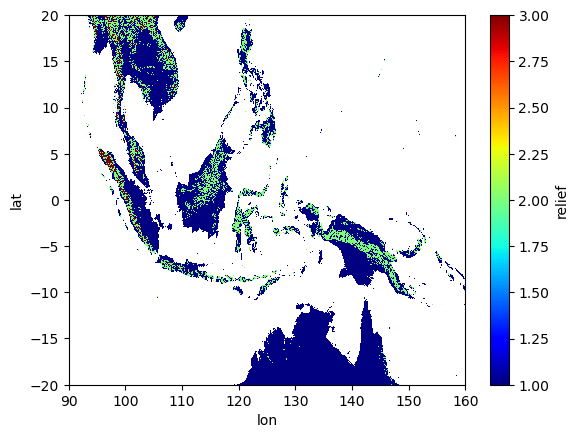

In [16]:

file1 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc')
file2 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/IMERG_V07_2000_2023_monthly.nc')
file3 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/topographic_factors_etopo.nc')
#file1
#file2
#file3
# Plotting the data
#file1.B_BATHY[0,:,:].plot(cmap='jet', vmax=3000)
#file2.imerg[0,:,:].plot(cmap='jet', vmax=30, x='lon', y='lat')
#file3.slope[:,:].plot(cmap='jet', x='lon', y='lat')
file3.relief[:,:].plot(cmap='jet', x='lon', y='lat')

# 2. Developing Masks for High Land and Planar Regions

### 2.1 Creating High Land and Planar Region Masks

In [17]:
relief = file3.relief[:,:]
high_land = relief.where(relief > 1)
low_land = relief.where(relief == 1)
#high_land.plot(cmap='jet',  vmin=0, vmax=3, x='lon', y='lat')
#low_land.plot(cmap='jet',  vmin=0, vmax=3, x='lon', y='lat')


### 2.2 Plotting the High Land and Planar Points

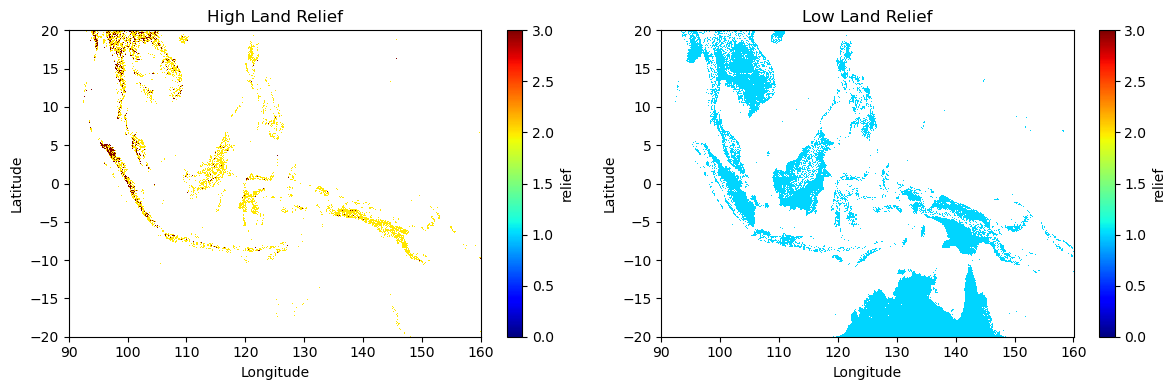

In [18]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = high_land.plot(ax=axs[0], cmap='jet', vmin=0, vmax=3, x='lon', y='lat')
axs[0].set_title('High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = low_land.plot(ax=axs[1], cmap='jet', vmin=0, vmax=3,x='lon', y='lat')
axs[1].set_title('Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub2, ax=axs[1], label='Relief Value')

#colorbar.remove()
#colorbar.remove()

# Adjust layout
plt.tight_layout()
plt.show()

# 3. Extracting Rainfall Data Over High and Low Land Data Points for All Time Steps

In [19]:
rain = file2.imerg[:,:,:]

# Get dimensions of imerg
dims = file2.imerg.dims  # Returns a dictionary of dimension names and sizes
shape = file2.imerg.shape  # Returns a tuple of the shape of the array

# Print dimensions and shape
print("Dimensions:", dims)
print("Shape:", shape)
shape[0]

rain_high_land = rain.where(relief > 1)
rain_low_land  = rain.where(relief == 1)
#rain_high_land.plot(cmap='jet',  vmin=0, vmax=30,x='lon', y='lat') 


Dimensions: ('time', 'lon', 'lat')
Shape: (275, 701, 401)


# 4. Plotting the Rainfall Data

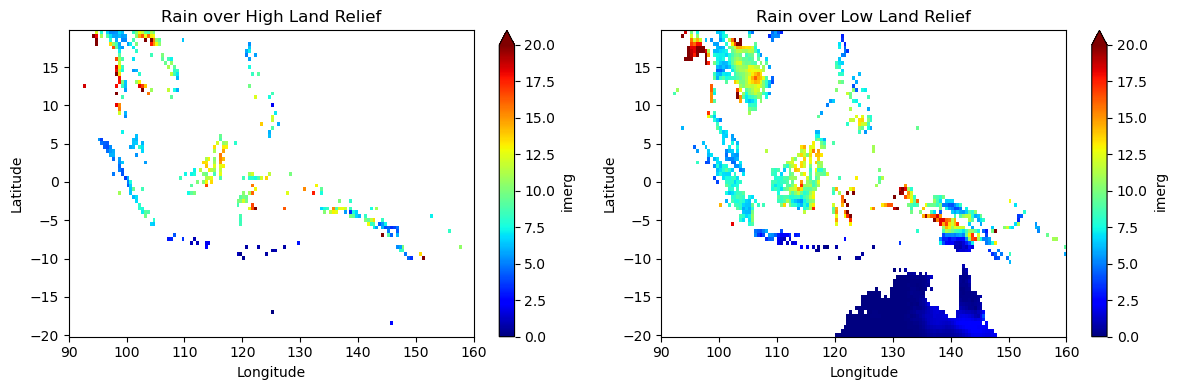

In [20]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = rain_high_land[0,:,:].plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, x='lon', y='lat')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = rain_low_land[0,:,:].plot(ax=axs[1], cmap='jet', vmin=0, vmax=20,x='lon', y='lat')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub2, ax=axs[1], label='Relief Value')

#colorbar.remove()
#colorbar.remove()

# Adjust layout
plt.tight_layout()
plt.show()

# 5. Selecting the Domain of Interest and Calculating Mean Rainfall Along Longitude and Latitude

In [21]:
#setting the domain of interest
top = 10
bottom = -11
left = 90
right = 160
rain_high_sel = rain_high_land.sel(lon=slice(left,right), lat=slice(bottom, top))
rain_low_sel = rain_low_land.sel(lon=slice(left,right), lat=slice(bottom, top))

# taking the average along lon and lat
high_rain_lon_avg = rain_high_sel.mean(dim=['lon'])
high_rain_lat_avg = rain_high_sel.mean(dim=['lat'])

low_rain_lon_avg = rain_low_sel.mean(dim=['lon'])
low_rain_lat_avg = rain_low_sel.mean(dim=['lat'])

#high_rain_lon_avg.plot(cmap='jet',  vmin=0, vmax=30,x='lat', y='time') 
#low_rain_lon_avg.plot(cmap='jet',  vmin=0, vmax=30,y='lat', x='time') 


# 6. Plotting the Resulting Arrays
### 6.1 Plotting Mean Rainfall Across Different Latitudes

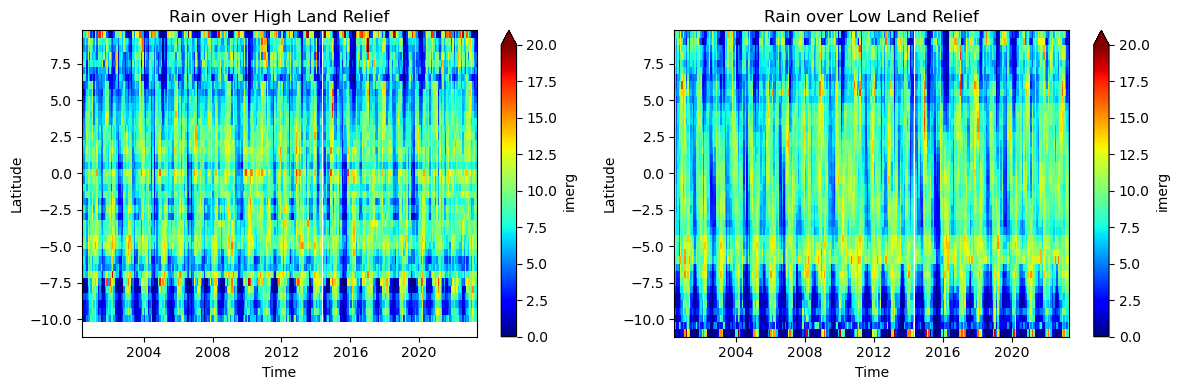

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = high_rain_lon_avg.plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, y='lat', x='time')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')

# Plot low land
sub2 = low_rain_lon_avg.plot(ax=axs[1], cmap='jet', vmin=0, vmax=20, y='lat', x='time')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()
plt.show()


### 6.2 Plotting Mean Rainfall Across Different Longitudes

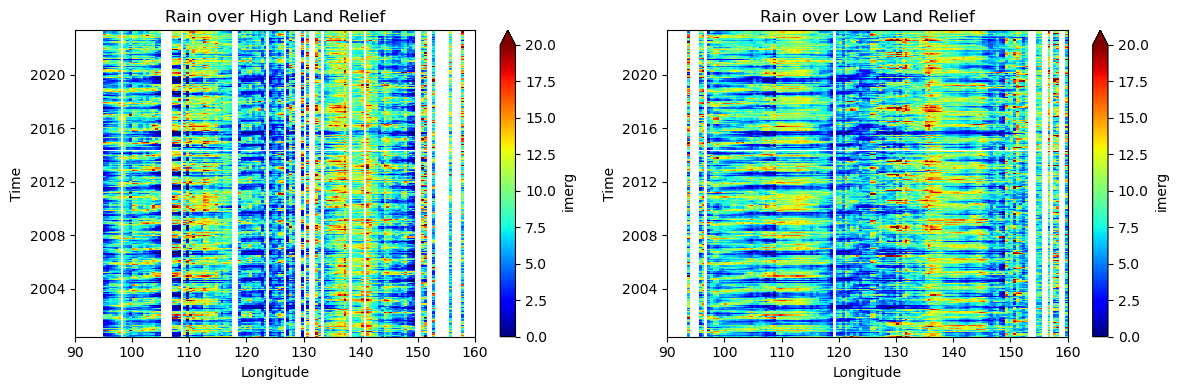

In [23]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sub1 = high_rain_lat_avg.plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, x='lon', y='time')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Time')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = low_rain_lat_avg.plot(ax=axs[1], cmap='jet', vmin=0, vmax=20, x='lon', y='time')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Time')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
#import pickle

# Save variables
#with open('mean_rainfall_data.pkl', 'wb') as f:
#    pickle.dump((high_rain_lat_avg, high_rain_lon_avg, low_rain_lat_avg,low_rain_lon_avg), f)